In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [1]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 3.7MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=19c9cabef4806e6dd4710689f5af10c4d8a536dd26041939664cf3a260166e37
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 983kB 2.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=12001a88c5a3423ed6a3580816aabf23bc6ffe6d7b8d7db899f7b189430f49bc
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [2]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [4]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/Data and Notebook/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/.shortcut-targets-by-id/1dI67RTtEW-SJRhnNRkrF26W-uhDV3Asg/Morgan Stanley Project/Data and Notebook


In [ ]:
# tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
# df = pd.DataFrame(t.__dict__ for t in tweets)
# Saving a file
# df.to_csv('TwitterData.csv')

In [126]:
#Importing Various twitter data
#Merril Lynch
df_ml = pd.read_json('pretty_ml_tweets.json')

#Goldman Sachs
df_gs = pd.read_json('pretty_gs_tweets.json')

#Morgan Stanley
df_ms = pd.read_json('pretty_ms_tweets.json')

#JP Morgan and Chase
df_jp = pd.read_json('pretty_jp_tweets.json')

#Wealth Management
df_wm = pd.read_json('wm_tweets.json')

In [42]:
df_all = pd.concat([df_ml,df_gs,df_ms,df_jp,df_wm])

In [6]:
df_ml.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,[],[],False,False,0,[https://bankinformer.com/829588/merrill-lynch...,,0,[],0,bankinformer,Merrill Lynch market indicator that correctly ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-02-09 22:46:18,2018-02-09 22:46:18,962095339984576512,/bankinformer/status/962095339984576512,192862672,Bank Informer,
1,False,[],[],False,False,0,[http://www.marketwatch.com/news/story.asp?gui...,,0,[],0,PS641600,The Tell: The ‘markets stop panicking when cen...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-02-09 22:25:16,2018-02-09 22:25:16,962090046571646976,/PS641600/status/962090046571646976,224811364,PeterS,
2,True,[英会話pic],[https://pbs.twimg.com/media/DVn4EPqVQAAH_nl.jpg],False,False,0,[http://twib.in/l/8XkyEj8EG4aq],,0,[],0,EnglistA,The 'markets stop panicking when the Fed start...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-02-09 21:16:32,2018-02-09 21:16:32,962072749542813696,/EnglistA/status/962072749542813697,3197333635,EnglistA,
3,False,[],[],False,False,0,[https://www.ml.com/articles/stayin-alive-manu...,,0,[],0,MISconsult,Merrill Lynch on manufacturing. Technologies a...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-02-09 21:10:17,2018-02-09 21:10:17,962071177526050816,/MISconsult/status/962071177526050816,1002139914,MIS Consulting&Sales,
4,False,[],[],False,False,1,[https://advisorhub.com/former-merrill-exec-wi...,,0,[],0,SLKLAW,Shumaker Attorneys Defeat Merrill Lynch’s Atte...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-02-09 20:51:31,2018-02-09 20:51:31,962066452898488320,/SLKLAW/status/962066452898488322,836243082,"Shumaker, Loop & Kendrick, LLP",


In [43]:
import numpy as np
import regex as re
import nltk
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
df_all['text'] = np.vectorize(remove_pattern)(df_all['text'], "@[\w]*: | *RT*")

In [45]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))
cleaned_tweets = []

for index, row in df_all.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.text.split() if not word in stopwords_set]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))

df_all['text'] = cleaned_tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


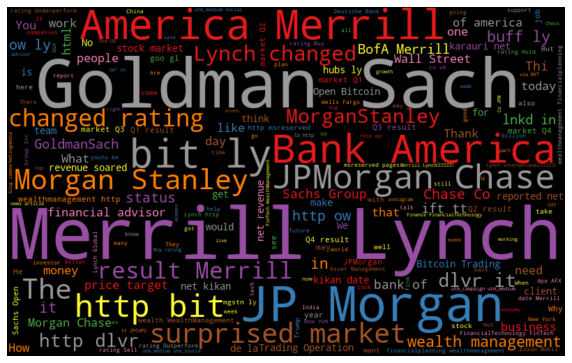

In [47]:
all_words = ' '.join([text for text in df_all['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap="Set1",stopwords=["pic",'http bit',"https","twitter","com",'and','www']).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [127]:
analyzer = SentimentIntensityAnalyzer()

In [133]:
sentiment = df_ml['text'].apply(lambda x: analyzer.polarity_scores(x))

In [134]:
df_ml = pd.concat([df_ml, sentiment.apply(pd.Series)],1)

In [135]:
df_ml['date'] = df_ml['timestamp'].apply(lambda x: x.date())

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(q1.groupby('date').mean()['compound'].index, q1.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q1.groupby('date').mean()['neg'].index, q1.groupby('date').mean()['neg'].values)
plt.plot(q1.groupby('date').mean()['neu'].index, q1.groupby('date').mean()['neu'].values)
plt.plot(q1.groupby('date').mean()['pos'].index, q1.groupby('date').mean()['pos'].values)

In [138]:
def conditions(df_ml):
    if (df_ml['compound'] < -0.05):
        return 'Negatve'
    elif (df_ml['compound'] > 0.05):
        return 'Positive'
    else:
        return 'Neutral'

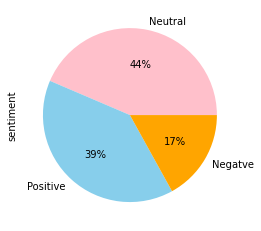

In [139]:
df_ml['sentiment'] = df_ml.apply(conditions, axis=1)
df_ml['sentiment'].unique()

df_ml.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["pink", "skyblue", "orange"])

In [ ]:
print(df_ml['timestamp'].min())
print(df_ml['timestamp'].max())

2018-02-01 21:15:13
2020-03-25 23:42:38


In [112]:
df_gs['date'] = pd.to_datetime(df_gs['timestamp'])
df_gs = df_gs.set_index(df_gs['timestamp'])
df_gs = df_gs.sort_index()

In [ ]:
# Dividing df_all on the basis of half yearly data
q1 = df_ml[:'2018-06-30']
q2 = df_ml['2018-07-01':'2018-12-31']
q3 = df_ml['2019-01-01':'2019-06-30']
q4 = df_ml['2019-07-01':'2019-12-31']
q5 = df_ml['2020-01-01':]

In [ ]:
#Sentiment Analysis
#Vader Sentiment

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# year 2018 first half

In [ ]:
sentiment = q1['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
#Inserting the sentiment into the dataframe
q1 = pd.concat([q1, sentiment.apply(pd.Series)],1)

In [ ]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
q1['date'] = q1['timestamp'].apply(lambda x: x.date())

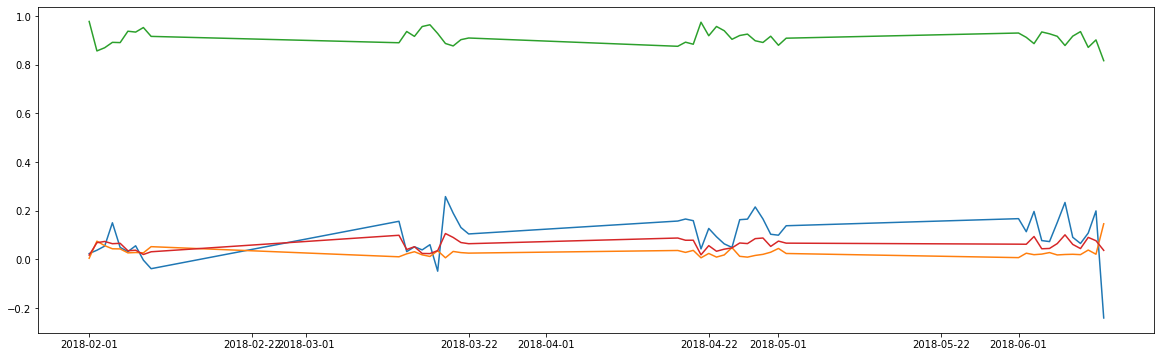

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q1.groupby('date').mean()['compound'].index, q1.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q1.groupby('date').mean()['neg'].index, q1.groupby('date').mean()['neg'].values)
plt.plot(q1.groupby('date').mean()['neu'].index, q1.groupby('date').mean()['neu'].values)
plt.plot(q1.groupby('date').mean()['pos'].index, q1.groupby('date').mean()['pos'].values)

In [ ]:
# year 2018 second half

In [ ]:
sentiment = q2['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
q2 = pd.concat([q2, sentiment.apply(pd.Series)],1)

In [ ]:
q2['date'] = q2['timestamp'].apply(lambda x: x.date())

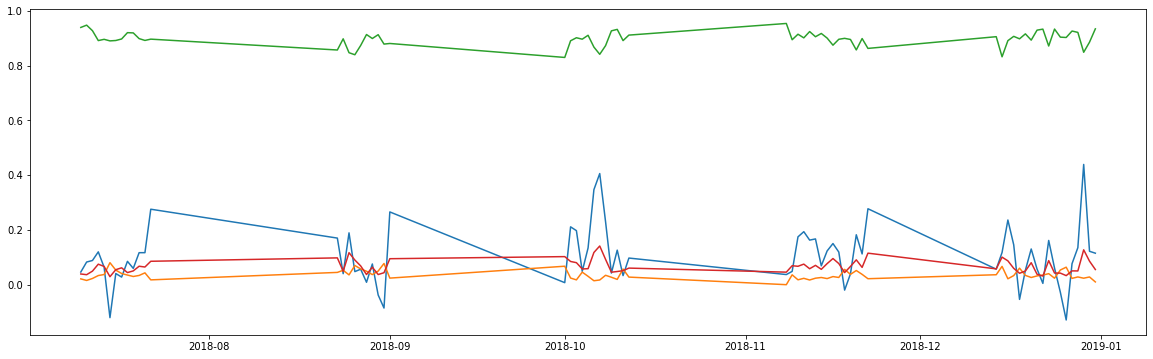

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q2.groupby('date').mean()['compound'].index, q2.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q2.groupby('date').mean()['neg'].index, q2.groupby('date').mean()['neg'].values)
plt.plot(q2.groupby('date').mean()['neu'].index, q2.groupby('date').mean()['neu'].values)
plt.plot(q2.groupby('date').mean()['pos'].index, q2.groupby('date').mean()['pos'].values)

In [ ]:
# year 2019 first half

In [ ]:
sentiment = q3['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
q3 = pd.concat([q3, sentiment.apply(pd.Series)],1)

In [ ]:
q3['date'] = q3['timestamp'].apply(lambda x: x.date())

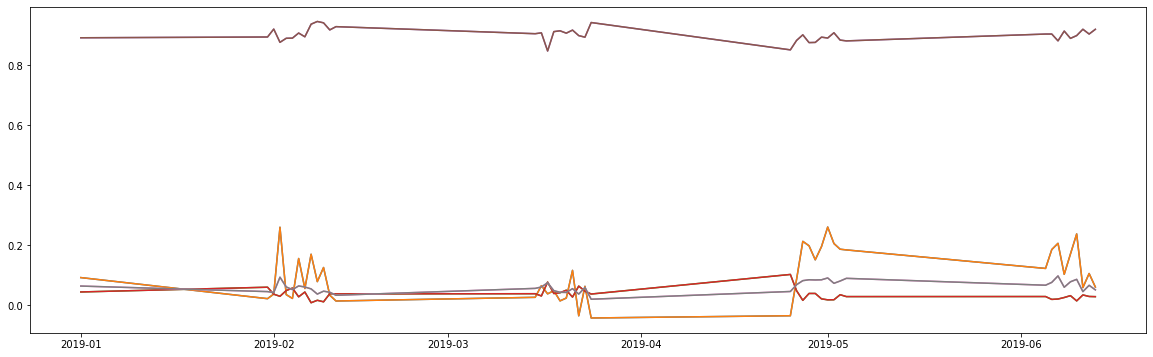

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q3.groupby('date').mean()['compound'].index, q3.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q3.groupby('date').mean()['neg'].index, q3.groupby('date').mean()['neg'].values)
plt.plot(q3.groupby('date').mean()['neu'].index, q3.groupby('date').mean()['neu'].values)
plt.plot(q3.groupby('date').mean()['pos'].index, q3.groupby('date').mean()['pos'].values)

In [ ]:
# year 2019 second half

In [ ]:
sentiment = q4['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
q4 = pd.concat([q4, sentiment.apply(pd.Series)],1)

In [ ]:
q4['date'] = q4['timestamp'].apply(lambda x: x.date())

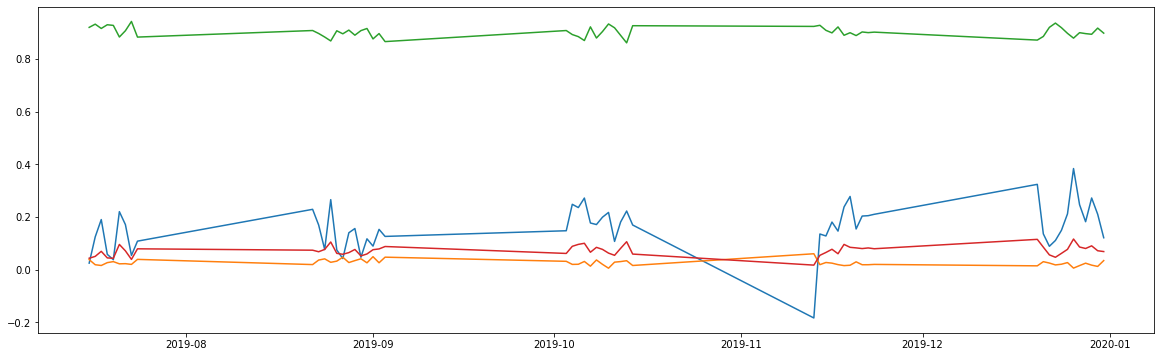

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q4.groupby('date').mean()['compound'].index, q4.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q4.groupby('date').mean()['neg'].index, q4.groupby('date').mean()['neg'].values)
plt.plot(q4.groupby('date').mean()['neu'].index, q4.groupby('date').mean()['neu'].values)
plt.plot(q4.groupby('date').mean()['pos'].index, q4.groupby('date').mean()['pos'].values)

In [ ]:
# year 2020 first half

In [ ]:
sentiment = q5['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
q5 = pd.concat([q5, sentiment.apply(pd.Series)],1)

In [ ]:
q5['date'] = q5['timestamp'].apply(lambda x: x.date())

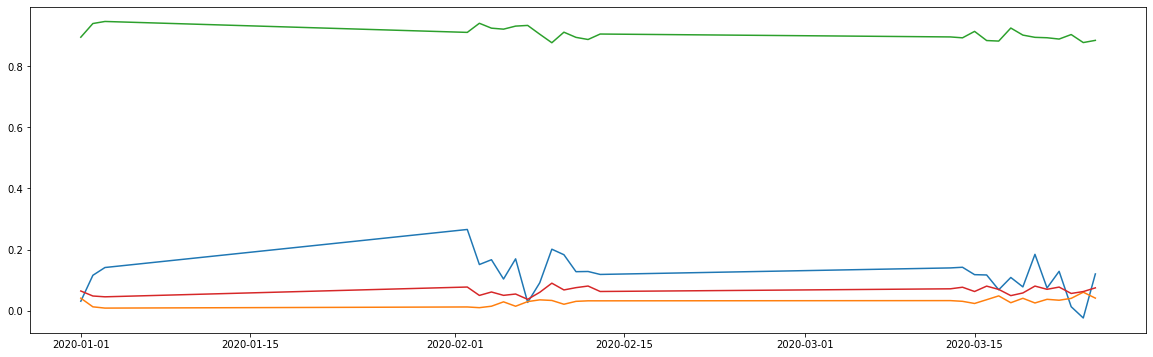

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(q5.groupby('date').mean()['compound'].index, q5.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(q5.groupby('date').mean()['neg'].index, q5.groupby('date').mean()['neg'].values)
plt.plot(q5.groupby('date').mean()['neu'].index, q5.groupby('date').mean()['neu'].values)
plt.plot(q5.groupby('date').mean()['pos'].index, q5.groupby('date').mean()['pos'].values)

In [113]:
# Dividing df_all on the basis of yearly data
y1 = df_gs[:'2018-12-31']
y2 = df_gs['2019-01-01':'2019-12-31']
y3 = df_gs['2020-01-01':]

In [114]:
# Year 1 - 2018

In [115]:
sentiment = y1['text'].apply(lambda x: analyzer.polarity_scores(x))

In [116]:
y1 = pd.concat([y1, sentiment.apply(pd.Series)],1)

In [117]:
y1['date'] = y1['timestamp'].apply(lambda x: x.date())

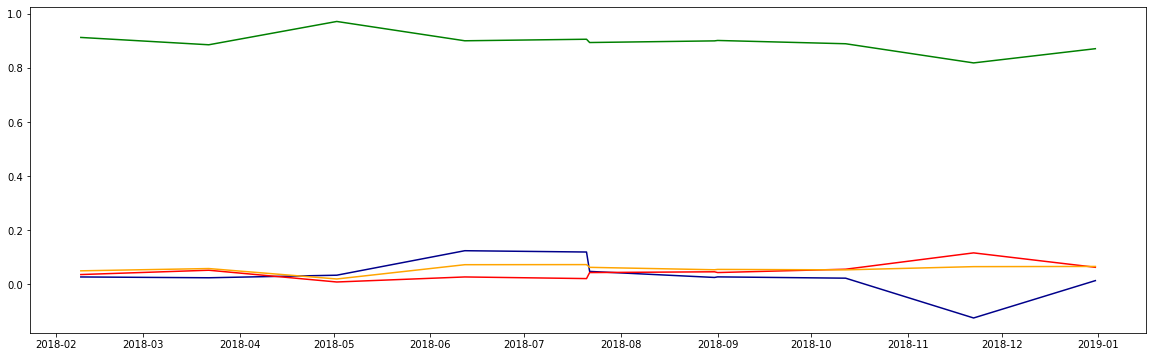

In [118]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(y1.groupby('date').mean()['compound'].index, y1.groupby('date').mean()['compound'].values, label = 'com',color='darkblue')

plt.plot(y1.groupby('date').mean()['neg'].index, y1.groupby('date').mean()['neg'].values,color='red')
plt.plot(y1.groupby('date').mean()['neu'].index, y1.groupby('date').mean()['neu'].values,color='green')
plt.plot(y1.groupby('date').mean()['pos'].index, y1.groupby('date').mean()['pos'].values,color='orange')

In [119]:
# Year 2 - 2019

In [120]:
sentiment = y2['text'].apply(lambda x: analyzer.polarity_scores(x))

In [121]:
y2 = pd.concat([y2, sentiment.apply(pd.Series)],1)

In [122]:
y2['date'] = y2['timestamp'].apply(lambda x: x.date())

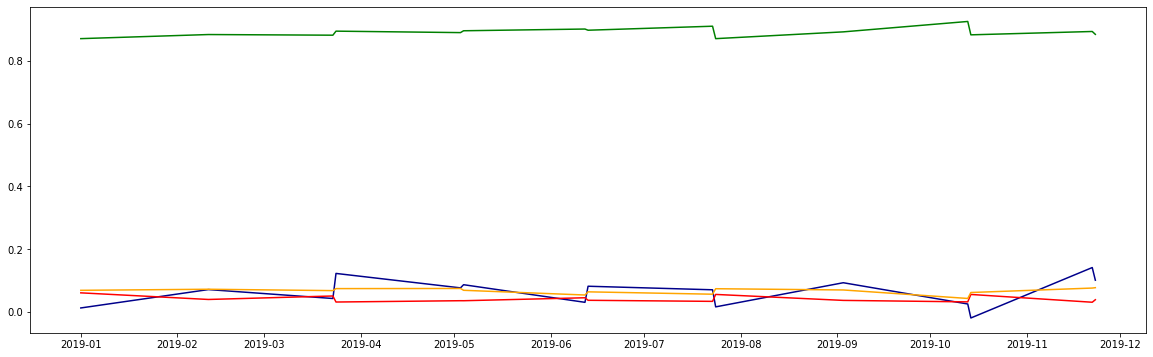

In [123]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(y2.groupby('date').mean()['compound'].index, y2.groupby('date').mean()['compound'].values, label = 'com',color='darkblue')

plt.plot(y2.groupby('date').mean()['neg'].index, y2.groupby('date').mean()['neg'].values,color='red')
plt.plot(y2.groupby('date').mean()['neu'].index, y2.groupby('date').mean()['neu'].values,color='green')
plt.plot(y2.groupby('date').mean()['pos'].index, y2.groupby('date').mean()['pos'].values,color='orange')

In [70]:
# Year 3 - 2020

In [71]:
sentiment = y3['text'].apply(lambda x: analyzer.polarity_scores(x))

In [72]:
y3 = pd.concat([y3, sentiment.apply(pd.Series)],1)

In [73]:
y3['date'] = y3['timestamp'].apply(lambda x: x.date())

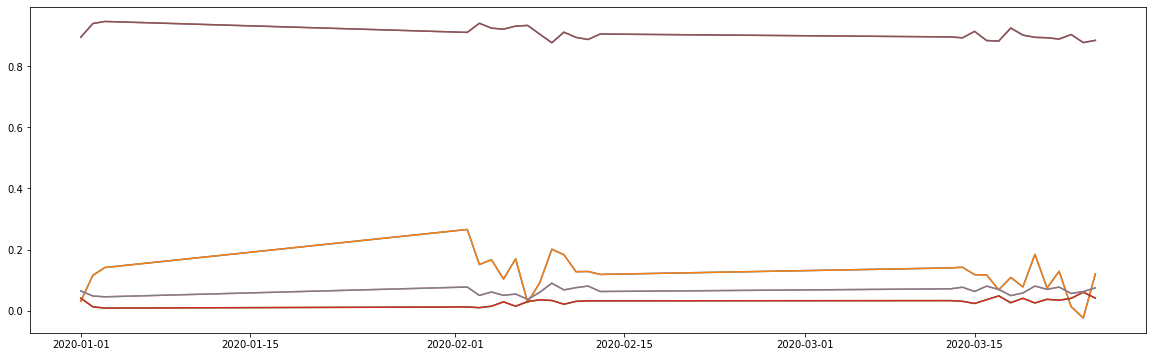

In [74]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(y3.groupby('date').mean()['compound'].index, y3.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(y3.groupby('date').mean()['neg'].index, y3.groupby('date').mean()['neg'].values)
plt.plot(y3.groupby('date').mean()['neu'].index, y3.groupby('date').mean()['neu'].values)
plt.plot(y3.groupby('date').mean()['pos'].index, y3.groupby('date').mean()['pos'].values)